In [16]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import os, glob, cv2, random
import seaborn as sns
import pandas as pd

In [17]:
def read_csv(path):
  width = 34
  height = 26
  dims = 1

  with open(path,'r') as f:
    #read the scv file with the dictionary format
    reader = csv.DictReader(f)
    rows = list(reader)

  #imgs is a numpy array with all the images
  #tgs is a numpy array with the tags of the images
  imgs = np.empty((len(list(rows)),height,width, dims),dtype=np.uint8)
  tgs = np.empty((len(list(rows)),1))

  for row,i in zip(rows,range(len(rows))):
    #convert the list back to the image format
    img = row['image']
    img = img.strip('[').strip(']').split(', ')
    im = np.array(img,dtype=np.uint8)
    im = im.reshape((height, width))
    im = np.expand_dims(im, axis=2)
    imgs[i] = im

    #the tag for open is 1 and for close is 0
    tag = row['state']
    if tag == 'open':
      tgs[i] = 1
    else:
      tgs[i] = 0

  #shuffle the dataset
  index = np.random.permutation(imgs.shape[0])
  imgs = imgs[index]
  tgs = tgs[index]

  #return images and their respective tags
  return imgs, tgs

In [25]:
base_path = 'dataset'

X, y = read_csv(os.path.join(base_path, 'dataset.csv'))

print(X.shape, y.shape)

(2874, 26, 34, 1) (2874, 1)


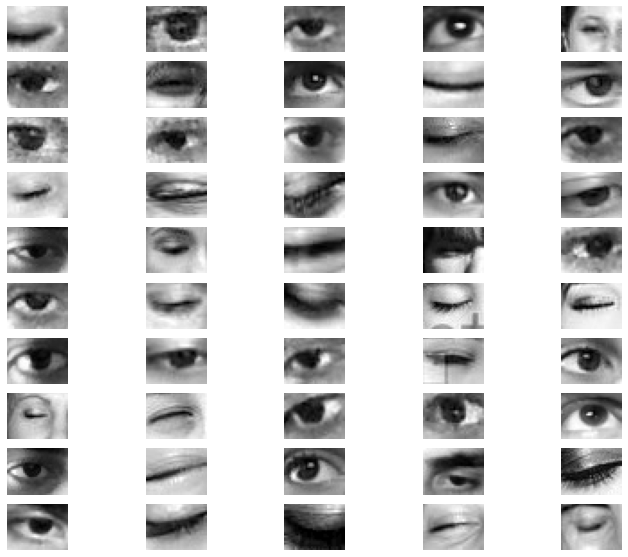

In [26]:
plt.figure(figsize=(12, 10))
for i in range(50):
    plt.subplot(10, 5, i+1)
    plt.axis('off')
    plt.imshow(X[i].reshape((26, 34)), cmap='gray')

C:\Users\kkeee\anaconda3\envs\blinkeye\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

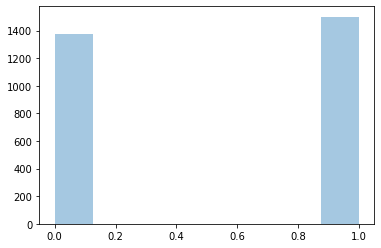

In [27]:

sns.distplot(y, kde=False)

In [28]:
n_total = len(X)
X_result = np.empty((n_total, 26, 34, 1))

for i, x in enumerate(X):
    img = x.reshape((26, 34, 1))
    
    X_result[i] = img

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X_result, y, test_size=0.1)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

np.save('dataset/x_train.npy', x_train)
np.save('dataset/y_train.npy', y_train)
np.save('dataset/x_val.npy', x_val)
np.save('dataset/y_val.npy', y_val)

(2586, 26, 34, 1) (2586, 1)
(288, 26, 34, 1) (288, 1)


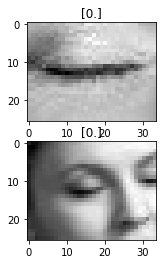

In [31]:
plt.subplot(2, 1, 1)
plt.title(str(y_train[0]))
plt.imshow(x_train[0].reshape((26, 34)), cmap='gray')
plt.subplot(2, 1, 2)
plt.title(str(y_val[4]))
plt.imshow(x_val[4].reshape((26, 34)), cmap='gray')

C:\Users\kkeee\anaconda3\envs\blinkeye\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

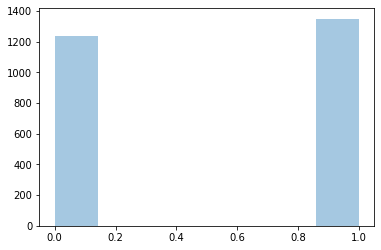

In [32]:

sns.distplot(y_train, kde=False)


<AxesSubplot:>

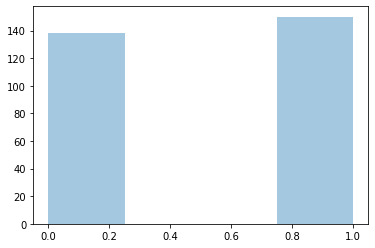

In [33]:
sns.distplot(y_val, kde=False)